# Dinâmica social da tolerância, motivação e confiança

*Ciência política em Python!*

Quais condutas são robustas/persistentes na sociedade? E quais tendem a desaparecer?
O que é altruísmo? Isso existe?
Quais comportamentos são benéficos para todos a médio/longo prazo?
Como podemos criar tolerância, motivação e confiança naqueles que estão de alguma forma próximos a nós? Isso é possível, mesmo que os envolvidos sejam rivais?
Do que a intolerência, a desmotivação e a desconfiança se alimentam?

O objetivo da palestra é tentar responder a essas perguntas com um pouco de filosofia/lógica, e um pouco de teoria dos jogos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_columns = 8 # O padrão é 20
pd.options.display.max_rows = 20   # O padrão é 60

## Por que palestrar sobre isso?

Tudo começou com uma discussão
sobre o paradoxo da confiança de Karl Popper (1945):

> Menos conhecido é o paradoxo da tolerância:
> tolerância ilimitada leva ao desaparecimento da tolerância.
> Se estendermos tolerância ilimitada
> até mesmo para aqueles que são intolerantes,
> se não estivermos preparados para defender a sociedade tolerante
> contra a investida dos intolerantes,
> então os tolerantes serão destruídos,
> e a tolerância junto destes.

![](paradoxo_tolerancia.jpg)

O que esse paradoxo diz é que todos devemos ser intolerantes
àquilo que consideramos intolerância.
Há casos óbvios:
tolerância a *serial killers* e autoritários frios como Stálin
levará a abusos destrutivos.

Porém, o próprio julgamento do que é "intolerância"
pode vir a ser um sinal de intolerância,
tornando o argumento de Popper apenas um reforço
para que intolerantes se sintam justificados
em aplicar sua intolerância. **Cuidado**!!!

O mesmo argumento dado ao par *tolerância / intolerância*
pode ser aplicado a outros pares, tais como:

- *Motivação* / *desmotivação*
- *Confiança/credibilidade* / *desconfiança*

Uma atitude desmotivada/desmotivadora/destrutiva de uma pessoa
pode minar com a motivação de outras pessoas.
Permitir e motivar essa desmotivação é uma atitude auto-destrutiva
para quem pretende motivar outras pessoas.

Mas por que "desaparecimento" da tolerância?
O que aconteceriam com aqueles que toleram tudo?
Analogamente,
o que aconteceriam com altruístas incondicionais em uma sociedade?

Essa é a primeira motivação para estudarmos
um pouco do que a teoria dos jogos
(vista aqui como o estudo da tomada de decisão
 na presença de adversários),
tem a nos dizer sobre robustez, estabilidade e outras características
de comportamentos sociais
no estudo da propagação da confiança.

Outra motivação é que, há muito tempo,
o Brasil está em uma situação pouco amigável
para o desenvolvimento de uma cultura de confiança
<https://ourworldindata.org/trust>:

![](ourworldindata_screenshot.png)

## Dilema do prisioneiro

Copiando do [Wikipedia](https://pt.wikipedia.org/wiki/Dilema_do_prisioneiro):

> Dois suspeitos, A e B, são presos pela polícia.
> A polícia tem provas insuficientes para os condenar,
> mas, separando os prisioneiros, oferece a ambos o mesmo acordo:
> se um dos prisioneiros, confessando, testemunhar contra o outro
> e esse outro permanecer em silêncio,
> o que confessou sai livre
> enquanto o cúmplice silencioso cumpre 10 anos de sentença.
> Se ambos ficarem em silêncio,
> a polícia só pode condená-los a 6 meses de cadeia cada um.
> Se ambos traírem o comparsa, cada um leva 5 anos de cadeia.
> Cada prisioneiro faz a sua decisão
> sem saber que decisão o outro vai tomar,
> e nenhum tem certeza da decisão do outro.
> A questão que o dilema propõe é: o que vai acontecer?
> Como o prisioneiro vai reagir?

$$
\text{A} \quad\quad \left|
\begin{array}{rrcll}
{}           & A\,coopera                  &                                           & B\,coopera \\
A\,trapaceia &                             & 6\,\text{meses} \,\Big|\, 6\,\text{meses} &            & B\,trapaceia \\
{}           & 0 \,\Big|\, 10\,\text{anos} &                                           & 10\,\text{anos} \,\Big|\, 0 \\
{}           &                             & 5\,\text{anos} \,\Big|\, 5\,\text{anos}
\end{array}
\right| \quad\quad \text{B}
$$

Para o jogador $A$ tomar uma decisão,
ele se preocupa com a decisão de $B$:

- Suponha que $B$ irá trapacear. Qual a decisão de $A$ que minimiza a própria pena?

$$
\text{A} \quad\quad \left|
\begin{array}{rrcll}
{}           & A\,coopera &                                                    & \cancel{B\,coopera} \\
A\,trapaceia &            & \cancel{6\,\text{meses} \,\Big|\, 6\,\text{meses}} & & B\,trapaceia \\
{}           & \cancel{0 \,\Big|\, 10\,\text{anos}} &                          & 10\,\text{anos} \,\Big|\, 0 \\
{}           &                                      & 5\,\text{anos} \,\Big|\, 5\,\text{anos}
\end{array}
\right| \quad\quad \text{B}
$$

Trapaceando, a pena é menor!

- Suponha que $B$ irá cooperar. Qual a decisão de $A$ que minimiza a própria pena?

$$
\text{A} \quad\quad \left|
\begin{array}{rrcll}
{}           & A\,coopera                  &                                           & B\,coopera \\
A\,trapaceia &                             & 6\,\text{meses} \,\Big|\, 6\,\text{meses} & & \cancel{B\,trapaceia} \\
{}           & 0 \,\Big|\, 10\,\text{anos} &                                           & \cancel{10\,\text{anos} \,\Big|\, 0} \\
{}           &                             & \cancel{5\,\text{anos} \,\Big|\, 5\,\text{anos}}
\end{array}
\right| \quad\quad \text{B}
$$

Novamente, a pena é menor trapaceando!

Dilema:

- Trapacear levará a um resultado melhor, independente da ação do adversário;
- Os resultados de ambos colaborando é melhor que o de ambos trapaceando.

Caso os 2 jogadores $A$ e $B$ nunca mais se encontrem,
a solução desse jogo é sempre trapacear.
Segundo Axelrod e Hamilton (1981),
essa é a solução estável biológica:

> [...] se as recompensas forem derivadas da aptidão,
> e as interações entre pares de indivíduos
> forem aleatórias e não se repetirem,
> então qualquer população
> com uma mistura de estratégias herdáveis
> evoluirá para um estado no qual
> todos os indivíduos são desertores.
> Além disso, nenhuma estratégia mutante distinta
> poderá sozinha fazer melhor que o restante
> quando a população estiver utilizando tal estratégia
> (sempre desertar).
> Nesse quesito, a estratégia de deserção é estável.

## Dilema do prisioneiro iterado

*O que acontece quando os jogadores jogam o mesmo jogo (dilema do prisioneiro) mais de uma vez?*

Em 1981, o cientista político Robert Axelrod
junto com o biólogo William Donald Hamilton
publicaram um artigo chamado 
*The Evolution of Cooperation*
(A evolução da cooperação),
o qual possui um estudo desse jogo iterado,
com a aplicação de diferentes estratégias,
além de exemplos de contextualização biológica.
Em 1984, Axelrod publicou um livro homônimo
como continuação à pesquisa.

Nicky Case criou um jogo baseado nessa pesquisa!!!

URL: <https://ncase.me/trust/>.

A continuação deste *notebook* depende do conteúdo do link acima.
O texto da continuação deste *notebook* é fundamentalmente
uma tentativa de simular e analisar, no Python,
diferentes estratégias para o dilema do prisioneiro iterado.

O código fonte do material do Nicky Case está disponível em
<https://github.com/ncase/trust/>.

Podemos estudar as diferentes estratégias de acordo com:

- Robustez (persiste em um contexto no qual há diversas outras estratégias)
- Estabilidade (quando estabelecida, resiste a novas estratégias pouco frequentes)
- Viabilidade de início
  (em ambientes predominantemente não-cooperativos, é possível ter posição?)

Conclusão do artigo de 1981 de Axelrod e Hamilton:

> A ênfase de Darwin na vantagem individual
> foi formalizada utilizando a teoria dos jogos.
> Isto cria condições sobre as quais
> a cooperação baseada em reciprocidade
> pode evoluir.

## Biblioteca `axelrod` no PyPI

Há uma biblioteca em Python criada exatamente para analisar,
com diferentes estratégias, o dilema do prisioneiro iterado!
Ela pode ser obtida em <https://github.com/Axelrod-Python/Axelrod>
ou no [PyPI](https://pypi.org/project/axelrod).
A instalação pode ser feita com `pip install axelrod`.

In [3]:
import axelrod as axl
axl.seed(0) # Usaremos valores aleatórios!
axl.__version__

'4.4.0'

Documentação da biblioteca:
<https://axelrod.readthedocs.io/en/stable/index.html>.

### `axl.Game`

Ao definir um jogo personalizado,
os valores para usar na biblioteca são da seguinte forma
(nomes definidos no artigo de 1981):

- $R$ (*Reward*): Recompensa quando ambos cooperam
- $P$ (*Punishment*): Penalidade quando ambos trapaçam
- $S$ (*Sucker*): Sacaneado, perda por ingenuidade para quem cooperou com um trapaceiro
- $T$ (*Temptation*): Tentação para o trapaceiro que enganou quem cooperou

|$\left. {}_{\displaystyle A} \Big\\ {}^{\displaystyle B} \right.$|$B$ coopera|$B$ trapaça|
|-|-|-|
|**$A$ coopera**|$\left. {}_{\displaystyle R} \Big\\ {}^{\displaystyle R} \right.$|$\left. {}_{\displaystyle S} \Big\\ {}^{\displaystyle T} \right.$|
|**$A$ trapaça**|$\left. {}_{\displaystyle T} \Big\\ {}^{\displaystyle S} \right.$|$\left. {}_{\displaystyle P} \Big\\ {}^{\displaystyle P} \right.$|

Temos um dilema do prisioneiro quando:

- $T > R > P > S$, pois $T > R$ e $P > S$ são as inequações
  que justificam a trapaça/deserção no jogo não iterado,
  e $R > P$ é o que faz a cooperação mútua ser melhor
  que a trapaça/deserção mútua; e
- $R > \dfrac{S + T}{2}$, do contrário uma defasada alternância
  entre colaboração e deserção (o "ciclo de vingança" do *tit-for-tat*)
  traria um resultado melhor que a constante cooperação mútua.

No dilema do prisioneiro inicial deste *notebook*, em anos, temos:

In [4]:
pdilema = axl.Game(t=0, r=-.5, p=-5, s=-10)
pdilema

Axelrod game: (R,P,S,T) = (-0.5, -5, -10, 0)

Podemos ver a tabela de pontuações/resultados desse jogo:

In [5]:
pdilema.scores

{(C, C): (-0.5, -0.5), (D, D): (-5, -5), (C, D): (-10, 0), (D, C): (0, -10)}

Os valores `C` e `D` correspondem ao *enum* `Action`,
que possui os dois tipos de ações:

* `axl.Action.C` (*Cooperating*): Colaborar
* `axl.Action.D` (*Defection/Deceiving*): Desertar/Enganar/Trapacear

In [6]:
pdilema.score((axl.Action.C, axl.Action.D))

(-10, 0)

O jogo padrão, quando não definido,
é dado por $(R, P, S, T) = (3, 1, 0, 5)$,
o jogo exemplificado no artigo de 1981.

### Estratégias e jogadores

O pacote já vem com muitas estratégias prontas!

In [7]:
len(axl.strategies)

227

Essa é uma lista de classes, cada uma definindo uma estratégia.
Jogadores são instâncias dessas classes.

In [8]:
axl.strategies[:31:10]

[axelrod.strategies.adaptive.Adaptive,
 axelrod.strategies.titfortat.AntiTitForTat,
 axelrod.strategies.axelrod_second.Borufsen,
 axelrod.strategies.cooperator.Cooperator]

Os nomes estão despejados no namespace principal
(podemos usar `axl.Cooperator` ao invés de
 `axl.strategies.cooperator.Cooperator`).
Quais são as estratégias dos personagens vistos
no projeto do Nicky Case?

![](peep_characters.png)

|Código             |Player      |Jogador   |
|------------------:|:----------:|:--------:|
|`axl.TitForTat()`  |*Copycat*   |Copiador  |
|`axl.Defector()`   |*Cheater*   |Trapaceiro|
|`axl.Cooperator()` |*Cooperator*|Cooperador|
|`axl.Grudger()`    |*Grudger*   |Rancoroso |
|?                  |*Detective* |Detetive  |
|`axl.TitFor2Tats()`|*Copykitten*|Copiador2 |
|?                  |*Simpleton* |Simplista |
|`axl.Random()`     |*Random*    |Aleatório |

Para a maioria dos personagens, há uma classe.
Para os outros, veremos depois como criar uma classe.
Por hora, vamos aprender a usar essas classes prontas.

A documentação das estratégias encontra-se em
<https://axelrod.readthedocs.io/en/stable/reference/all_strategies.html>.

### Um jogo por vez!

In [9]:
jogador_a = axl.TitForTat()
jogador_b = axl.Defector()

Os jogadores possuem o método `play`,
que realiza um jogo
e armazena os resultados nos próprios jogadores.

In [10]:
jogador_a.play(jogador_b)

In [11]:
vars(jogador_a)

{'init_kwargs': OrderedDict(),
 'history': [C],
 'classifier': {'memory_depth': 1,
  'stochastic': False,
  'makes_use_of': set(),
  'long_run_time': False,
  'inspects_source': False,
  'manipulates_source': False,
  'manipulates_state': False},
 'cooperations': 1,
 'defections': 0,
 'state_distribution': defaultdict(int, {(C, D): 1}),
 'match_attributes': {'length': -1,
  'game': Axelrod game: (R,P,S,T) = (3, 1, 0, 5),
  'noise': 0}}

In [12]:
vars(jogador_b)

{'init_kwargs': OrderedDict(),
 'history': [D],
 'classifier': {'memory_depth': 0,
  'stochastic': False,
  'makes_use_of': set(),
  'long_run_time': False,
  'inspects_source': False,
  'manipulates_source': False,
  'manipulates_state': False},
 'cooperations': 0,
 'defections': 1,
 'state_distribution': defaultdict(int, {(D, C): 1}),
 'match_attributes': {'length': -1,
  'game': Axelrod game: (R,P,S,T) = (3, 1, 0, 5),
  'noise': 0}}

Jogos subsequentes irão fazer o histórico crescer
e atualizará o número de cooperações ou trapaças.

In [13]:
jogador_b.play(jogador_a)

In [14]:
list(zip(jogador_a.history, jogador_b.history))

[(C, D), (D, D)]

In [15]:
jogadores_dict = {"A": jogador_a, "B": jogador_b}
{name: (j.cooperations, j.defections)
 for name, j in jogadores_dict.items()}

{'A': (1, 1), 'B': (0, 2)}

Podemos limpar o estado do jogador com o método `reset`:

In [16]:
jogador_a.reset()
jogador_a.cooperations, jogador_a.defections, jogador_a.history

(0, 0, [])

### Partida de jogos consecutivos entre $2$ jogadores, com `axl.Match`

Embora seja possível usar o método `play` dos jogadores,
há uma forma mais prática de realizar
uma sequência de acontecimentos.

In [17]:
players_match = [axl.TitForTat(), axl.Random()]
match = axl.Match(players=players_match, turns=5)
match.play()

[(C, D), (D, D), (D, C), (C, C), (C, D)]

Aqui estamos usando o jogo padrão
$(R, P, S, T) = (3, 1, 0, 5)$.
Para mudar, basta passar o parâmetro `game`
na instanciação do `axl.Match`.

In [18]:
match.scores()

[(0, 5), (1, 1), (5, 0), (3, 3), (0, 5)]

### Jogador humano

A classe `axl.Human` corresponde ao jogador humano,
com dados entrados manualmente via *stdin*.
Não funciona no Jupyter notebook.
Exemplo de partida contra o *copycat*:

```python
import axelrod as axl
players = [axl.Human(name="Fulano"), axl.TitForTat()]
match = axl.Match(, turns=8)
match.play()
```

### Estratégia personalizada

Estratégias são classes que herdam de `axl.Player`
e possuem:

* Atributo `name`, string com o nome da estratégia para exibição
* Atributo `classifier` com outros metadados (opcional)
* Método `strategy(self, opponent)`:
  método que deve realizar uma partida
  contra um dado oponente
  e deve devolver uma ação `axl.Action.C` ou `axl.Action.D`.

A tabela não mapeou em estratégias do pacote `axelrod`
todas as estratégias vistas na implementação do Nicky Case.
Vamos criar classes para as estratégias que faltaram!

In [19]:
C = axl.Action.C
D = axl.Action.D

#### Detetive

In [20]:
class Detective(axl.Player):
    name = "Detective"
    classifier = {
        "memory_depth": float("inf"),
        "stochastic": False,
        "makes_use_of": set(),
        "long_run_time": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }
    def strategy(self, opponent):
        hist_size = len(self.history)
        if hist_size <= 3:
            return [C, D, C, C][hist_size]
        if D not in opponent.history[:4]:
            return D
        return opponent.history[-1] # TFT

In [21]:
axl.Match(
    players=[axl.TitForTat(), Detective()],
    turns=8,
).play()

[(C, C), (C, D), (D, C), (C, C), (C, C), (C, C), (C, C), (C, C)]

In [22]:
axl.Match(
    players=[axl.Cooperator(), Detective()],
    turns=8,
).play()

[(C, C), (C, D), (C, C), (C, C), (C, D), (C, D), (C, D), (C, D)]

#### Simplista

In [23]:
class Simpleton(axl.Player):
    name = "Simpleton"
    classifier = {
        "memory_depth": 1,
        "stochastic": False,
        "makes_use_of": set(),
        "long_run_time": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }
    def strategy(self, opponent):
        if not self.history:
            return C
        if opponent.history[-1] == C:
            return self.history[-1]
        if self.history[-1] == C:
            return D
        return C

In [24]:
axl.Match(
    players=[axl.Defector(), Simpleton()],
    turns=8,
).play()

[(D, C), (D, D), (D, C), (D, D), (D, C), (D, D), (D, C), (D, D)]

`axl.Alternator` is a contant cycle strategy C D C D C D ...

In [25]:
axl.Match(
    players=[axl.Alternator(), Simpleton()],
    turns=8,
).play()

[(C, C), (D, C), (C, D), (D, D), (C, C), (D, C), (C, D), (D, D)]

### Um único torneio / campeonato com `axl.Tournament`

Todos contra todos apenas uma vez,
como o primeiro torneio da explicação do Nicky Case.
Qual dos $5$ jogadores irá vencer esse torneio?

In [26]:
players_nc1 = [
    axl.TitForTat(),
    axl.Defector(),
    axl.Cooperator(),
    axl.Grudger(),
    Detective(),
]
game_nc1 = axl.Game(r=2, p=0, s=-1, t=3)
tournament = axl.Tournament(
    players_nc1,
    game=game_nc1,
    turns=10,
    repetitions=1,
)
tresults = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 282.83it/s]


Torneio realizado.
Agora podemos ver os resultados!
Quem ganhou?

In [27]:
tresults.ranked_names

['Tit For Tat', 'Grudger', 'Defector', 'Detective', 'Cooperator']

Podemos ver a mesma informação
com base nos índices do objeto original
(lista `players_nc1`)
ao invés de strings de nomes:

In [28]:
tresults.ranking

[0, 3, 1, 4, 2]

In [29]:
np.array(players_nc1)[tresults.ranking]

array([Tit For Tat, Grudger, Defector, Detective, Cooperator],
      dtype=object)

In [30]:
np.array(tresults.players)[tresults.ranking]

array(['Tit For Tat', 'Grudger', 'Defector', 'Detective', 'Cooperator'],
      dtype='<U11')

Pontuações finais:

In [31]:
tresults.scores

[[57], [45], [29], [46], [45]]

#### Pontuação média / amortizada

Esses foram os resultados médios de $10$ jogos entre de cada par de jogadores
(a linha do jogador representa o quanto ele "ganhou" ou "perdeu",
 a coluna do jogador representa o quanto ele fez o adversário "ganhar" ou "perder"):

In [32]:
tresults.payoff_matrix

[[2.0, -0.1, 2.0, 2.0, 1.8],
 [0.3, 0.0, 3.0, 0.3, 0.9],
 [2.0, -1.0, 2.0, 2.0, -0.1],
 [2.0, -0.1, 2.0, 2.0, 0.7],
 [1.8, -0.3, 2.7, 0.3, 1.8]]

,Tit For Tat,Defector,Cooperator,Grudger,Detective
Tit For Tat,2.0,-0.1,2.0,2.0,1.8
Defector,0.3,0.0,3.0,0.3,0.9
Cooperator,2.0,-1.0,2.0,2.0,-0.1
Grudger,2.0,-0.1,2.0,2.0,0.7
Detective,1.8,-0.3,2.7,0.3,1.8


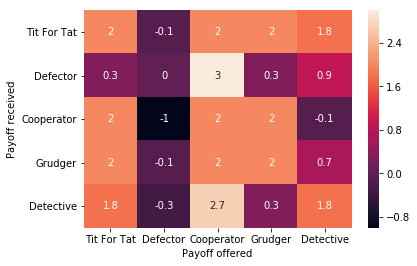

In [33]:
payoff_matrix_df_nc1 = pd.DataFrame(tresults.payoff_matrix,
                                    index=tresults.players,
                                    columns=tresults.players)
sns.heatmap(payoff_matrix_df_nc1, annot=True).set(
    xlabel="Payoff offered",
    ylabel="Payoff received",
)
payoff_matrix_df_nc1

Ao invés de usar o `seaborn`,
pode-se usar o recurso nativo da biblioteca `axelrod`
para fazer o *heat map*
(a ordem das linhas/colunas é a do ranking, não a da entrada):

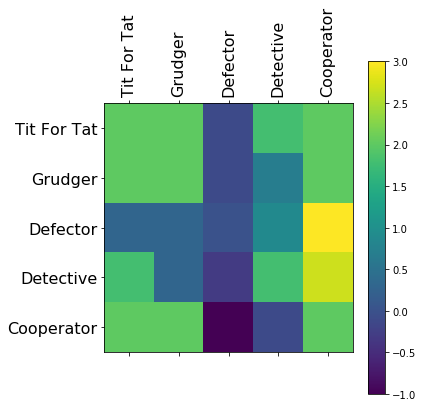

In [34]:
axl.Plot(tresults).payoff()
plt.gcf().set(figwidth=5, figheight=5);

A biblioteca `axelrod` possui outros recursos de plot,
mas não serão vistos neste *notebook*.

#### Sumário estatístico

In [35]:
tsummary = tresults.summarise()
pd.DataFrame(tsummary).set_index("Rank").T

Rank,0,1,2,3,4
Name,Tit For Tat,Grudger,Defector,Detective,Cooperator
Median_score,1.425,1.15,1.125,1.125,0.725
Cooperation_rating,0.75,0.575,0,0.45,1
Wins,0,1,4,1,0
Initial_C_rate,1,1,0,1,1
CC_rate,0.7,0.525,0,0.3,0.575
CD_rate,0.05,0.05,0,0.15,0.425
DC_rate,0.025,0.05,0.375,0.225,0
DD_rate,0.225,0.375,0.625,0.325,0
CC_to_C_rate,1,1,0,0.595238,1


#### Cooperação

O número de cooperações de cada *match* também é guardado,
caso a caso.

In [36]:
tresults.cooperation

[[10, 1, 10, 10, 9],
 [0, 0, 0, 0, 0],
 [10, 10, 10, 10, 10],
 [10, 1, 10, 10, 2],
 [9, 3, 3, 3, 9]]

,Tit For Tat,Defector,Cooperator,Grudger,Detective
Tit For Tat,10,1,10,10,9
Defector,0,0,0,0,0
Cooperator,10,10,10,10,10
Grudger,10,1,10,10,2
Detective,9,3,3,3,9


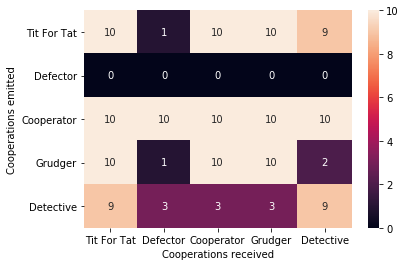

In [37]:
cooperation_df_nc1 = pd.DataFrame(tresults.cooperation,
                                  index=tresults.players,
                                  columns=tresults.players)
sns.heatmap(cooperation_df_nc1, annot=True).set(
    xlabel="Cooperations received",
    ylabel="Cooperations emitted",
)
cooperation_df_nc1

Para referência, o número de partidas neste caso foi constante,
igual a $10$ (número armazenado em `tournament.turns`):

In [38]:
tresults.match_lengths

[[[10.0, 10.0, 10.0, 10.0, 10.0],
  [10.0, 10.0, 10.0, 10.0, 10.0],
  [10.0, 10.0, 10.0, 10.0, 10.0],
  [10.0, 10.0, 10.0, 10.0, 10.0],
  [10.0, 10.0, 10.0, 10.0, 10.0]]]

In [39]:
tournament.turns # Poderia ser diferente, se usássemos o prob_end

10

In [40]:
tresults.num_players # Número de linhas e colunas das matrizes

5

A divisão entre esses valores está disponível diretamente:

In [41]:
tresults.normalised_cooperation

[[1.0, 0.1, 1.0, 1.0, 0.9],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 0.1, 1.0, 1.0, 0.2],
 [0.9, 0.3, 0.3, 0.3, 0.9]]

Ignorando a diagonal, a média de cada linha
nos fornece a taxa de cooperação:

In [42]:
ncooperation_ar_nc1 = np.array(tresults.normalised_cooperation)
np.fill_diagonal(ncooperation_ar_nc1, 0)
ncooperation_ar_nc1.sum(axis=1) / (tresults.num_players - 1)

array([0.75 , 0.   , 1.   , 0.575, 0.45 ])

Ou, diretamente:

In [43]:
tresults.cooperating_rating

[0.75, 0.0, 1.0, 0.575, 0.45]

Esses valores fundamentam
as [medidas de "moralidade" de Tyler Singer-Clark](
https://axelrod.readthedocs.io/en/stable/tutorials/further_topics/morality_metrics.html
),
tais como a matriz de "boa parceria",
que representa quais pares de jogadores distintos
nos quais o jogador da linha associada não fica em desvantagem
(jogador de referência):

In [44]:
tresults.good_partner_matrix

[[0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0],
 [1, 1, 0, 1, 1],
 [1, 1, 1, 0, 0],
 [1, 1, 0, 1, 0]]

,Tit For Tat,Defector,Cooperator,Grudger,Detective
Tit For Tat,0,1,1,1,1
Defector,0,0,0,0,0
Cooperator,1,1,0,1,1
Grudger,1,1,1,0,0
Detective,1,1,0,1,0


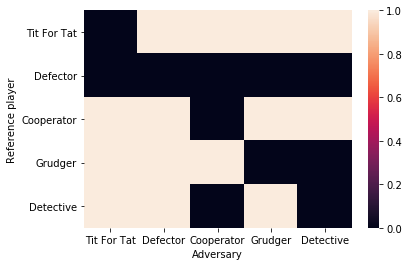

In [45]:
good_partner_df_nc1 = pd.DataFrame(tresults.good_partner_matrix,
                                  index=tresults.players,
                                  columns=tresults.players)
sns.heatmap(good_partner_df_nc1).set(
    xlabel="Adversary",
    ylabel="Reference player",
)
good_partner_df_nc1

## Processo de Moran

Esse processo consiste em uma simulação da seleção natural,
em que a pontuação em cada partida sinaliza a aptidão do jogador.
A grosso modo, é um laço de $3$ passos/*rounds*/rodadas:

* São realizadas partidas entre cada par de jogadores, guardando os resultados acumulados
* Um jogador é escolhido para "reproduzir" (ter sua estratégia clonada),
  com probabilidade proporcional à pontuação naquele *round*/partida
* Um jogador é escolhido aleatoriamente para ser removido

O parâmetro `mode="db"` do `axl.MoranProcess` inverte os $2$ últimos passos,
tornando o modelo mais próximo do exemplo do Nicky Case.

Maiores informações em
<https://axelrod.readthedocs.io/en/stable/tutorials/getting_started/moran.html>.

In [46]:
all_players = (
    5 * [axl.TitForTat()] +
    25 * [axl.Defector()] +
    5 * [axl.Cooperator()] +
    8 * [axl.Grudger()] +
    10 * [Detective()] +
    5 * [axl.TitFor2Tats()] +
    5 * [Simpleton()] +
    10 * [axl.Random()]
)
mp = axl.MoranProcess(
    players=all_players,
    noise=.05,
    turns=10,
    prob_end=.01,
    game=game_nc1,
    mode="db",
)
max_rounds = 700
list(zip(mp, range(max_rounds))); # Ou mp.play()

*Nota*:
Apenas use `populations = mp.play()`
se souber que, em tempo finito,
o processo sempre resultará em uma sociedade homogênea.

Há "vencedor" (única estratégia sobrevivente)?

In [47]:
# String com o nome da estratégia, ou None se o resultado não for homogêneo
mp.winning_strategy_name

Em cada rodada, haviam quantos indivíduos de cada estratégia?

In [48]:
pd.DataFrame(mp.populations).fillna(0).astype(int)

,Cooperator,Defector,Detective,Grudger,Random: 0.5,Simpleton,Tit For 2 Tats,Tit For Tat
0,5,25,10,8,10,5,5,5
1,5,24,10,8,10,5,5,6
2,5,23,10,8,10,6,5,6
3,5,23,10,7,10,6,6,6
4,5,23,10,7,10,6,6,6
5,5,23,11,7,10,5,6,6
6,5,24,11,7,9,5,6,6
7,5,25,11,7,8,5,6,6
8,5,26,11,7,7,5,6,6
9,5,25,12,7,7,5,6,6


Há uma forma imediata de representar graficamente o número de indivíduos.

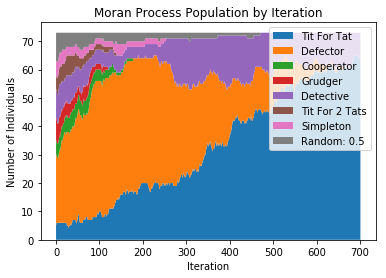

In [49]:
mp.populations_plot();

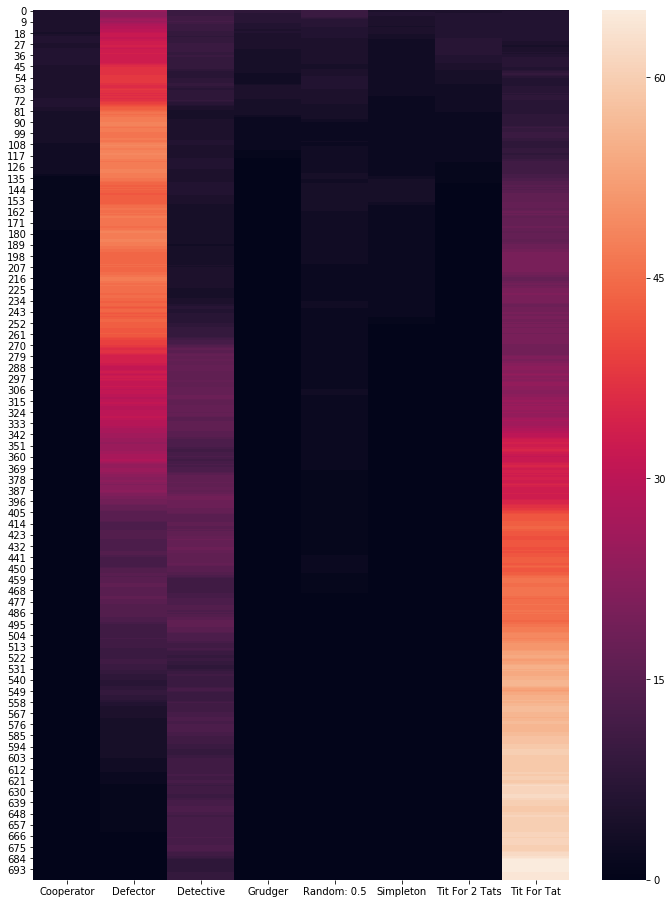

In [50]:
plt.figure(figsize=(12, 16))
sns.heatmap(pd.DataFrame(mp.populations).fillna(0));

As pontuações de cada rodada também são armazenadas,
embora não seja trivial interpretar esses dados
(a estratégia do indivíduo da $i$-ésima coluna
não é a mesma em todas as linhas/rodadas):

In [51]:
pd.DataFrame(mp.score_history)

,0,1,2,3,...,68,69,70,71
0,60.700000,72.458333,70.057143,64.788889,...,49.705556,45.261111,40.523810,49.092063
1,69.800000,72.598413,63.550000,66.647222,...,50.225000,49.380952,54.504762,47.983333
2,63.983333,71.582540,63.275000,62.511905,...,54.175000,51.400000,50.950000,50.629762
3,73.291667,67.642857,71.864286,67.814286,...,44.973016,49.300000,50.733333,48.521429
4,70.311111,64.514286,70.495238,72.350000,...,50.211111,52.952778,48.877778,49.283333
5,68.469841,68.344444,69.172619,69.823810,...,59.466270,49.650794,54.610714,48.207143
6,70.007143,65.975000,63.700000,67.157143,...,54.730556,43.083333,52.300000,48.192857
7,64.414286,72.969841,66.983333,62.755556,...,51.433333,43.505556,59.500000,42.951984
8,70.145238,67.439286,71.500000,67.875000,...,49.141667,47.669444,52.733333,51.388889
9,68.500000,62.022222,66.866667,69.389286,...,51.104762,50.677778,55.214286,49.025000


## Conclusões

Seguem *screenshots* das conclusões expostas por Nicky Case
(na versão traduzida por Bruno Lemos):

![](nc_conclusao1.png)

![](nc_conclusao2.png)

![](nc_conclusao3.png)

**FIM!**